_________________________________________________

### FEATURE ENGINEERING

In [3082]:
import pandas as pd
clean_df= pd.read_csv('part_1.csv')
clean_df.drop('Unnamed: 0',inplace = True,axis = 1)
clean_df.shape

(2443, 18)

In [3083]:
# убираем пустые строки
clean_df = clean_df[~clean_df.clean_text.isnull()]
clean_df.shape

(2423, 18)

In [3084]:
clean_df.head(3)

,screen_name,carrier,location,date_time,text,clean_text,polarity,fact,hour,sense_dummy,text_len,day,part_of_day,seconds,sin_time,cos_time,tokens,topic
0,ShieldVoC,verizonsupport,"Stockholm, Sweden",2021-04-14 23:57:51,RT @europabridge1: @VerizonSupport will someon...,someone please explain setting called turned p...,0.0,1,23,0,54,2,evening,86271,-0.009381,0.999956,"['someone', 'please', 'explain', 'setting', 'c...",17
1,ShieldVoC,verizon,"Stockholm, Sweden",2021-04-14 23:56:27,RT @halidkalkan: @Verizon trying to charge me ...,trying charge device never solve problem canno,0.0,1,23,0,46,2,evening,86187,-0.015489,0.999880,"['trying', 'charge', 'device', 'never', 'solve...",17
2,VerizonSupport,verizonsupport,NaN,2021-04-14 23:43:51,@MushShoe Thanks for confirming. We can assist...,thanks confirming assist plan change well happ...,0.5,0,23,1,54,2,evening,85431,-0.070409,0.997518,"['thanks', 'confirming', 'assist', 'plan', 'ch...",2


In [3085]:
# 1. drop duplicates

clean_df = clean_df.drop_duplicates('clean_text')
clean_df.shape

(2053, 18)

In [3086]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# благодаря параметру max_features мы оставляем 80% самых выжных фичей
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2),max_features = int(0.8 * 4309))
final_tf_idf = tf_idf_vect.fit_transform(clean_df['clean_text'].values)

final_tf_idf.shape

(2053, 3447)

In [3087]:
# начинаем создавать матрицу фичей

# добавление tfidf в нашу матрицу фичей 
feature_names = tf_idf_vect.get_feature_names()
feature_df = pd.DataFrame(final_tf_idf.toarray(), columns = feature_names)
feature_df.shape

(2053, 3447)

In [3088]:
# clean_df['clean_text'][0]

In [3089]:
# кумулятивный вес слова - оставить только те слова, которые суммарно приносят 80% идф
# accum = feature_df.transpose()
# words = [] 
# accum = accum[accum[0] !=0]
# accum
# accum['%'] = accum[0]/accum[0].sum()
# start = 0
# accum['plus'] = accum['%'].cumsum()
# accum = accum[accum['plus']<0.8]
# accum

In [3090]:
# вероятность городов
def city_proba(city):
    if type(city) != str:
        return clean_df[clean_df['location'].isna()]['location'].shape[0]/clean_df.shape[0]
    else:
        proba = clean_df.location.value_counts()/clean_df.shape[0]
    return proba[city]

city_proba('Stockholm, Sweden')


0.059912323429128105

In [3091]:
# проверка количества строк
# clean_df[clean_df['location'].isna()]['location'].shape[0]+clean_df.location.value_counts().sum()

In [3092]:
# добавляем вероятность городов в clean_df и в матрицу фичей
clean_df['location_proba'] = clean_df['location'].apply(lambda x:city_proba(x))
location_proba = list(clean_df['location_proba'])
feature_df['location_proba'] = location_proba



In [3093]:
feature_df[feature_df['location_proba'].isna()].shape

(0, 3448)

### RFM analysis

In [3094]:
clean_df.head(3)

,screen_name,carrier,location,date_time,text,clean_text,polarity,fact,hour,sense_dummy,text_len,day,part_of_day,seconds,sin_time,cos_time,tokens,topic,location_proba
0,ShieldVoC,verizonsupport,"Stockholm, Sweden",2021-04-14 23:57:51,RT @europabridge1: @VerizonSupport will someon...,someone please explain setting called turned p...,0.0,1,23,0,54,2,evening,86271,-0.009381,0.999956,"['someone', 'please', 'explain', 'setting', 'c...",17,0.059912
1,ShieldVoC,verizon,"Stockholm, Sweden",2021-04-14 23:56:27,RT @halidkalkan: @Verizon trying to charge me ...,trying charge device never solve problem canno,0.0,1,23,0,46,2,evening,86187,-0.015489,0.999880,"['trying', 'charge', 'device', 'never', 'solve...",17,0.059912
2,VerizonSupport,verizonsupport,NaN,2021-04-14 23:43:51,@MushShoe Thanks for confirming. We can assist...,thanks confirming assist plan change well happ...,0.5,0,23,1,54,2,evening,85431,-0.070409,0.997518,"['thanks', 'confirming', 'assist', 'plan', 'ch...",2,0.462737


In [3095]:
feature_df.head(3)

,able,able enjoy,able find,able get,able make,able resolve,able use,able watch,abo,absolute,...,your,your call,your customer,your sign,youtube,yttv,zip,zip code,zone,location_proba
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.059912
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.059912
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.462737


In [3096]:
import datetime as dt
import re
clean_df['date'] = clean_df['date_time'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
clean_df['date'] = clean_df['date'].apply(dt.datetime.date)
clean_df.head(1)

,screen_name,carrier,location,date_time,text,clean_text,polarity,fact,hour,sense_dummy,text_len,day,part_of_day,seconds,sin_time,cos_time,tokens,topic,location_proba,date
0,ShieldVoC,verizonsupport,"Stockholm, Sweden",2021-04-14 23:57:51,RT @europabridge1: @VerizonSupport will someon...,someone please explain setting called turned p...,0.0,1,23,0,54,2,evening,86271,-0.009381,0.999956,"['someone', 'please', 'explain', 'setting', 'c...",17,0.059912,2021-04-14


In [3097]:
recency = list(clean_df['date'].apply(lambda x: dt.date.today() - x))
recency
feature_df['recency'] = recency
feature_df['recency'] = feature_df['recency'].apply(lambda x: int(str(x).split()[0]))
feature_df[feature_df['recency'] == 'NaT']

,able,able enjoy,able find,able get,able make,able resolve,able use,able watch,abo,absolute,...,your call,your customer,your sign,youtube,yttv,zip,zip code,zone,location_proba,recency


In [3098]:
# feature_df[feature_df['location_proba'].isna()]

In [3099]:
# feature_df['frequency'] = f
frequency = list(clean_df['screen_name'].apply(lambda x: clean_df[clean_df['screen_name'] == x].shape[0]))
feature_df['frequency'] = frequency
clean_df['frequency'] = clean_df['screen_name'].apply(lambda x: clean_df[clean_df['screen_name'] == x].shape[0])

In [3100]:
monetary = list(clean_df['polarity'])
feature_df['monetary'] = monetary
feature_df.head(3)

,able,able enjoy,able find,able get,able make,able resolve,able use,able watch,abo,absolute,...,your sign,youtube,yttv,zip,zip code,zone,location_proba,recency,frequency,monetary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.059912,9,123,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.059912,9,123,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.462737,9,148,0.5


In [3101]:
# recency
r_q3 = feature_df['recency'].quantile(0.3)
r_q6 = feature_df['recency'].quantile(0.6)

feature_df['r'] = feature_df['recency'].apply(lambda x: 1 if x < r_q3 else(2 if r_q3<x<r_q6 else 3)  )
# frequency
f_q3 = feature_df['frequency'].quantile(0.3)
f_q6 = feature_df['frequency'].quantile(0.6)

feature_df['f'] = feature_df['frequency'].apply(lambda x: 1 if x < f_q3 else(2 if f_q3<x<f_q6 else 3)  )

# monetary
m_q3 = feature_df['monetary'].quantile(0.3)
m_q6 = feature_df['monetary'].quantile(0.6)

feature_df['m'] = feature_df['monetary'].apply(lambda x: 1 if x < m_q3 else(2 if m_q3<x<m_q6 else 3)  )
# feature_df['rfm'] = feature_df['r']*100 + feature_df['f']*10 + feature_df['m']

In [3102]:
# feature_df.drop(['r','f','m'],inplace = True,axis = 1)
feature_df.drop(['recency','frequency','monetary'],inplace = True,axis = 1)
feature_df.head(3)

,able,able enjoy,able find,able get,able make,able resolve,able use,able watch,abo,absolute,...,your sign,youtube,yttv,zip,zip code,zone,location_proba,r,f,m
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.059912,3,3,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.059912,3,3,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.462737,3,3,3


In [3103]:
# добавим метрики, которые можно было бы использовать для кластеризации
sin  = list(clean_df['sin_time'])
cos = list(clean_df['cos_time'])
text_len  = list(clean_df['text_len'])
topic = list(clean_df['topic'])
fact = list(clean_df['fact'])

feature_df['sin_time'] = sin
feature_df['cos_time'] = cos
feature_df['text_len'] = text_len
feature_df['topic'] = topic
feature_df['fact'] = fact

In [3104]:
# polarity  = list(clean_df['polarity'])
# feature_df['polarity'] = polarity            

In [3105]:
# наша матрица фичей
feature_df.head(1)

,able,able enjoy,able find,able get,able make,able resolve,able use,able watch,abo,absolute,...,zip code,zone,location_proba,r,f,m,sin_time,cos_time,text_len,topic
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.059912,3,3,3,-0.009381,0.999956,54,17


In [3106]:
clean_df.shape

(2053, 21)

In [3107]:
# from sklearn.preprocessing import MinMaxScaler  # класс для скалирования! 

# # Он сам будет считать максимумы, минимумы и делить! 

# # Объеявили скалировшик 
# scaler = MinMaxScaler( )

# # Обучили его на тренировочной выборке (он само посчитал все максимумы, минимумы, поделил)
# scaler.fit(feature_df) 

# # Теперь применяем его к нашим данным 
# norm_feature_df = pd.DataFrame(scaler.transform(feature_df),columns =list(feature_df.columns) )
# norm_feature_df.shape

from sklearn.preprocessing import StandardScaler  # класс для скалирования! 

# Он сам будет считать максимумы, минимумы и делить! 

# Объеявили скалировшик 
scaler = MinMaxScaler( )

# Обучили его на тренировочной выборке (он само посчитал все максимумы, минимумы, поделил)
scaler.fit(feature_df) 

# Теперь применяем его к нашим данным 
norm_feature_df = pd.DataFrame(scaler.transform(feature_df),columns =list(feature_df.columns) )
norm_feature_df.shape

(2053, 3455)

### CLUSTERING

### 1. добавить метрики кластеризации

    https://nafi.ru/upload/spss/Lection_9.pdf
    https://scikit-learn.org/stable/modules/clustering.html
    https://habr.com/ru/company/ods/blog/325654/
    https://habr.com/ru/company/jetinfosystems/blog/467745/
    https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
    https://habr.com/ru/post/67078/
    https://iq.opengenus.org/euclidean-vs-manhattan-vs-chebyshev-distance/#:~:text=the%20distance%20between%20squares%20on,its%20diagonals%20as%20coordinate%20axes
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score
    
    

In [3108]:
# K-means eucledean distance

num_clusters = 2

# Метод к-средних - KMeans
from sklearn.cluster import KMeans

euclidean_churn = KMeans(n_clusters=num_clusters)

# get_ipython().magic('time km.fit(tfidf_matrix)')
idx = euclidean_churn.fit(feature_df)
# print(km.labels_)
clean_df['euclidean_churn'] = euclidean_churn.labels_
# clusters = km.labels_.tolist()
clean_df['euclidean_churn'].value_counts()

0    1332
1     721
Name: euclidean_churn, dtype: int64

In [3109]:
silhouettes = []
from sklearn import metrics
silhouette1 = metrics.silhouette_score(feature_df, euclidean_churn.labels_,metric='euclidean')
print(silhouette1)
silhouettes.append(silhouette1)

0.529384889999626


In [3110]:
# pip install --user scikit-learn-extra

In [3111]:
# k-medoids Чебышев
from sklearn_extra.cluster import KMedoids

num_clusters = 2
chebyshev_churn = KMedoids(n_clusters=num_clusters,metric = 'chebyshev')
# print(km)

idx = chebyshev_churn.fit(feature_df)
# print(km.labels_)
clean_df['chebyshev_churn'] = chebyshev_churn.labels_
# clusters = km.labels_.tolist()
clean_df['chebyshev_churn'].value_counts()

0    2052
1       1
Name: chebyshev_churn, dtype: int64

In [3112]:

from sklearn import metrics
silhouette2 = metrics.silhouette_score(feature_df, chebyshev_churn.labels_,metric='chebyshev')
print(silhouette2)
silhouettes.append(silhouette2)

-0.3625168845308363


In [3113]:
# k-medoids squared eucledean
from sklearn_extra.cluster import KMedoids

num_clusters = 2
sqeuclidean = KMedoids(n_clusters=num_clusters,metric = 'sqeuclidean')
# print(km)

idx = sqeuclidean.fit(feature_df)
# print(km.labels_)
clean_df['sqeuclidean_churn'] = sqeuclidean.labels_
# clusters = km.labels_.tolist()
clean_df['sqeuclidean_churn'].value_counts()

0    1321
1     732
Name: sqeuclidean_churn, dtype: int64

In [3114]:
from sklearn import metrics
silhouette3= metrics.silhouette_score(feature_df, sqeuclidean.labels_,metric = 'sqeuclidean')
print(silhouette3)
silhouettes.append(silhouette3)

0.7232834576115361


In [3115]:
# Попробуем выделить лейблы churn по очень негативной полярности твитов 
# для дальнейшего сравнения близости выделенных нами групп с искуственно созданным таргетом

clean_df['naive_churn'] = clean_df['polarity'].apply(lambda x:1 if x <-0.5 else 0 )
clean_df['naive_churn'].value_counts()

0    2001
1      52
Name: naive_churn, dtype: int64

In [3116]:
clean_df.shape

(2053, 25)

In [3117]:
# сведем все показатели в таблицу для определения лучшего

from sklearn.metrics import roc_auc_score,precision_recall_curve,roc_curve,accuracy_score,recall_score
roc_aucs = []
accuracy = []
recall = []
cluster_distance = ['euclidean_churn','chebyshev_churn','sqeuclidean_churn']
for i in cluster_distance:
    if roc_auc_score(clean_df['naive_churn'], clean_df[i]) < 0.5:
        roc_aucs.append(1 - roc_auc_score(clean_df['naive_churn'], clean_df[i]))
    else:
        roc_aucs.append(roc_auc_score(clean_df['naive_churn'], clean_df[i]))
#     roc_aucs.append(roc_auc_score(clean_df['naive_churn'], clean_df[i]))
    accuracy.append(accuracy_score(clean_df['naive_churn'], clean_df[i]))
#     recall.append(1- recall_score(clean_df['naive_churn'], clean_df[i]))
scores = pd.DataFrame(columns = ['silhouette','roc_auc','accuracy'])
scores['silhouette'] = silhouettes
scores['roc_auc'] = roc_aucs
scores['accuracy'] = accuracy
# scores['recall'] = recall
scores.index = cluster_distance
scores

,silhouette,roc_auc,accuracy
euclidean_churn,0.529385,0.571642,0.634194
chebyshev_churn,-0.362517,0.500250,0.974184
sqeuclidean_churn,0.723283,0.574391,0.628836


### MIN-MAX scaler - не использовал для кластеризации т.к. портится качество

In [3118]:
# from sklearn.preprocessing import MinMaxScaler  # класс для скалирования! 

# # Он сам будет считать максимумы, минимумы и делить! 

# # Объеявили скалировшик 
# scaler = MinMaxScaler( )

# # Обучили его на тренировочной выборке (он само посчитал все максимумы, минимумы, поделил)
# scaler.fit(feature_df) 

# # Теперь применяем его к нашим данным 
# norm_feature_df = pd.DataFrame(scaler.transform(feature_df),columns =list(feature_df.columns) )
# norm_feature_df.shape

from sklearn.preprocessing import StandardScaler  # класс для скалирования! 

# Он сам будет считать максимумы, минимумы и делить! 

# Объеявили скалировшик 
scaler = MinMaxScaler( )

# Обучили его на тренировочной выборке (он само посчитал все максимумы, минимумы, поделил)
scaler.fit(feature_df) 

# Теперь применяем его к нашим данным 
norm_feature_df = pd.DataFrame(scaler.transform(feature_df),columns =list(feature_df.columns) )
norm_feature_df.shape



(2053, 3455)

In [3119]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(feature_df.iloc[:,-5:])
# dfx = pd.DataFrame(data=X,columns=feature_df.columns[-5:])
# # dfx
# pca_df = feature_df.loc[:,:'zoo']
# pca_df[dfx.columns] = dfx
# pca_df

#### ???исходя из свода метрик наилучшей выглядит разбивка по sqeuclidean_churn

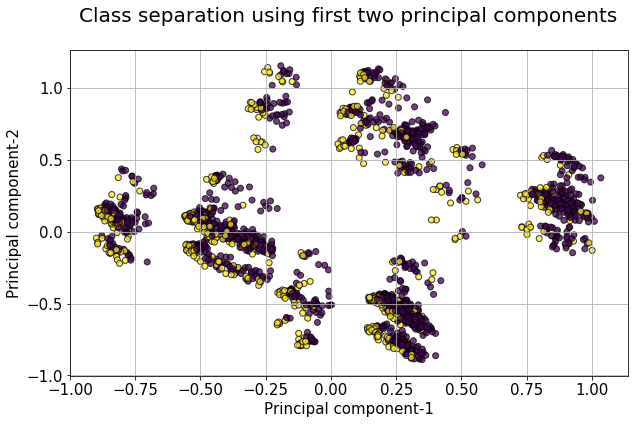

In [3120]:
# сделаем визуализацию с помощью метода главных компонент

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
res = pca.fit_transform(norm_feature_df)

# res[:,0].mean()
plt.figure(figsize=(10,6))
plt.scatter(res[:,0],res[:,1],c=clean_df['sqeuclidean_churn'],edgecolors='k',alpha=0.75)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()


In [3121]:
clean_df[clean_df['sqeuclidean_churn'] == 1].shape

(732, 25)

In [3122]:
# проставим 1 для меньшего класса

if clean_df[clean_df['sqeuclidean_churn'] == 1].shape[0]>clean_df[clean_df['sqeuclidean_churn'] == 0].shape[0]:
    clean_df['best_cluster_churn'] = clean_df['sqeuclidean_churn'].apply(lambda x : 1 if x == 0 else 0)
    
else:
    clean_df['best_cluster_churn'] = clean_df['sqeuclidean_churn']

clean_df['best_cluster_churn'].value_counts()

0    1321
1     732
Name: best_cluster_churn, dtype: int64

In [3123]:
clean_df.to_csv('part_2.csv')

In [3124]:
feature_df.to_csv('part_2_feature_df.csv')


In [3125]:
feature_df.shape

(2053, 3455)